In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

sns.set_theme(style='whitegrid')

## Season Top Performances (2001-2024; Men - 2:00.00 and faster, 320 pages)

In [12]:
pd.read_html('https://worldathletics.org/records/toplists/middlelong/800-metres/all/men/senior/2024?regionType=world&timing=electronic&page=1&bestResultsOnly=false&maxResultsByCountry=all&eventId=10229501&ageCategory=senior')[0]  # 2001-2024

,Rank,Mark,WIND,Competitor,DOB,Nat,Pos,Unnamed: 7,Venue,Date,Results Score
0,1,1:41.56,NaN,Djamel SEDJATI,03 MAY 1999,ALG,1,NaN,"Stade Charléty, Paris (FRA)",07 JUL 2024,1281
1,2,1:41.58,NaN,Emmanuel WANYONYI,01 AUG 2004,KEN,2,NaN,"Stade Charléty, Paris (FRA)",07 JUL 2024,1280
2,3,1:41.61,NaN,Gabriel TUAL,09 APR 1998,FRA,3,NaN,"Stade Charléty, Paris (FRA)",07 JUL 2024,1279
3,4,1:41.70,NaN,Emmanuel WANYONYI,01 AUG 2004,KEN,1,NaN,"Nyayo National Stadium, Nairobi (KEN)",15 JUN 2024,1276
4,5,1:42.08,NaN,Aaron Kemei CHEMININGWA,21 JUN 1998,KEN,4,NaN,"Stade Charléty, Paris (FRA)",07 JUL 2024,1264
...,...,...,...,...,...,...,...,...,...,...,...
95,96,1:44.81,NaN,Andreas KRAMER,13 APR 1997,SWE,5,NaN,"Egret Stadium, Xiamen (CHN)",20 APR 2024,1179
96,96,1:44.81,NaN,Paul ANSELMINI,02 AUG 2003,FRA,5f1,NaN,"Estadio Vallehermoso, Madrid (ESP)",21 JUN 2024,1179
97,98,1:44.82,NaN,Jakub DUDYCHA,05 SEP 2005,CZE,4,NaN,"Zdzisław Krzyszkowiak Stadium, Bydgoszcz (POL)",20 JUN 2024,1179
98,99,1:44.83,NaN,Noah KIBET,12 APR 2004,KEN,6,NaN,"Drake Stadium, Los Angeles, CA (USA)",18 MAY 2024,1179


## All Time List (1:46.00 and faster; 82 pages)

In [173]:
def download_all_time_800m(sex: str = 'men', pages: int = 82, export: bool = False) -> pd.DataFrame:
    '''Downloads all the 800m times below 1:46.00 from the World Athletics Database. There are currently 82 pages, but this might need to be updated as more runners run at or below their chosen threshold.
    
    Args:
      -  sex (`str`): 'men' or 'women'
    
    Returns:
      -  dfs (`pd.DataFrame`): a single table of all the concatenated pages of the World Athletics Database'''

    dfs = None

    match sex:
        case 'men':
            html_path = f'https://worldathletics.org/records/all-time-toplists/middlelong/800-metres/all/men/senior?regionType=world&timing=electronic&page=1&bestResultsOnly=false&firstDay=1899-12-31&lastDay={datetime.today() - timedelta(days=1):%Y-%m-%d}&maxResultsByCountry=all&eventId=10229501&ageCategory=senior'

        case 'women':
            html_path = f'https://worldathletics.org/records/all-time-toplists/middlelong/800-metres/all/women/senior?regionType=world&timing=electronic&page=1&bestResultsOnly=false&firstDay=1899-12-31&lastDay={datetime.today() - timedelta(days=1):%Y-%m-%d}&maxResultsByCountry=all&eventId=10229512&ageCategory=senior'

    for i in np.arange(1, pages + 1):
        df = pd.read_html(html_path.replace('page=1', f'page={i}'))[0]        

        if dfs is None:
            dfs = df
            continue

        dfs = pd.concat([dfs, df])

    dfs = dfs.reset_index(drop=True)

    if export:
        dfs.to_csv(f'data/all_time_{sex}_800m.csv', index=False)

    return dfs

### All Time Men's Performances

In [35]:
all_time_men = download_all_time_800m(pages=82, export=True)

In [55]:
all_time_men['Date'] = pd.to_datetime(all_time_men['Date'], format='%d %b %Y')
all_time_men['Year'] = all_time_men['Date'].dt.year
all_time_men['Mark_Sec'] = all_time_men['Mark'].apply(lambda row: 60. + float(row.split(':')[1]))
all_time_men.head()

,Rank,Mark,WIND,Competitor,DOB,Nat,Pos,Unnamed: 7,Venue,Date,Results Score,Year,Mark_Sec
0,1,1:40.91,NaN,David RUDISHA,17 DEC 1988,KEN,1,NaN,"Olympic Stadium, London (GBR)",2012-08-09,1301,2012,100.91
1,2,1:41.01,NaN,David RUDISHA,17 DEC 1988,KEN,1f1,NaN,"Stadio Guidobaldi, Rieti (ITA)",2010-08-29,1298,2010,101.01
2,3,1:41.09,NaN,David RUDISHA,17 DEC 1988,KEN,1,NaN,"Olympiastadion, Berlin (GER)",2010-08-22,1296,2010,101.09
3,4,1:41.11,NaN,Wilson KIPKETER,12 DEC 1972,DEN,1,NaN,Köln (GER),1997-08-24,1295,1997,101.11
4,5,1:41.24,NaN,Wilson KIPKETER,12 DEC 1972,DEN,1f1,NaN,Zürich (SUI),1997-08-13,1291,1997,101.24


In [184]:
# Most <= 1:46.00 Performances
all_time_men \
    .groupby(['Competitor', 'DOB'])['Mark'] \
    .count() \
    .sort_values(ascending=False) \
    .head(25) \
    .reset_index()

,Competitor,DOB,Mark
0,Johnny GRAY,19 JUN 1960,107
1,Wilfred BUNGEI,24 JUL 1980,98
2,Wilson KIPKETER,12 DEC 1972,94
3,Yuriy BORZAKOVSKIY,12 APR 1981,94
4,Marcin LEWANDOWSKI,13 JUN 1987,93
5,Mbulaeni MULAUDZI,08 SEP 1980,93
6,Hezekiel SEPENG,30 JUN 1974,93
7,Ferguson Cheruiyot ROTICH,30 NOV 1989,90
8,Adam KSZCZOT,02 SEP 1989,88
9,David RUDISHA,17 DEC 1988,80


In [163]:
# All the Kenyans who have run 1:46.00 or faster, and how many times they've done it
all_time_men.loc[(all_time_men['Year'] != 2025) & 
                 (all_time_men['Nat'] == 'KEN')][['Competitor', 'Mark']] \
                    .groupby('Competitor').agg('count').sort_values('Mark', ascending=False).head(10)

,Mark
Competitor,
Wilfred BUNGEI,98
Ferguson Cheruiyot ROTICH,90
David RUDISHA,80
William YIAMPOY,69
David KIPTOO SINGOEI,61
Joseph Mwengi MUTUA,56
Alfred Kirwa YEGO,55
Japheth KIMUTAI,49
Nixon KIPROTICH,45


In [147]:
# The Top Times for Kenyans this Year
all_time_men.loc[(all_time_men['Year'] == 2024) & 
                 (all_time_men['Nat'] == 'KEN')][['Competitor', 'Mark_Sec']] \
                    .groupby('Competitor').agg('min') \
                    .sort_values('Mark_Sec') \
                    .reset_index()

,Competitor,Mark_Sec
0,Emmanuel WANYONYI,101.58
1,Aaron Kemei CHEMININGWA,102.08
2,Wyclife KINYAMAL,102.08
3,Koitatoi KIDALI,102.66
4,Alex Ngeno KIPNGETICH,103.74
5,Festus LAGAT,104.55
6,Elias NGENY,104.79
7,Laban CHEPKWONY,104.83
8,Noah KIBET,104.83
9,Ferguson Cheruiyot ROTICH,104.90


In [165]:
# Number of <= 1:46.0 performances by country
all_time_men[['Nat', 'Mark_Sec']] \
                    .groupby('Nat').agg('count') \
                    .sort_values('Mark_Sec', ascending=False) \
                    .head(10)

,Mark_Sec
Nat,
KEN,2040
USA,1122
GBR,523
RSA,306
POL,278
FRA,259
MAR,257
ESP,256
ALG,223


In [158]:
# Number of individuals who have run <= 1:46.0 per country
all_time_men[['Nat','Competitor', 'Mark_Sec']] \
                    .groupby('Competitor').agg('min')  \
                    .groupby('Nat').agg('count') \
                    .sort_values('Mark_Sec', ascending=False) \
                    .head(10)

,Mark_Sec
Nat,
KEN,142
USA,122
GBR,68
FRA,39
ESP,36
AUS,25
RSA,23
MAR,22
ALG,21


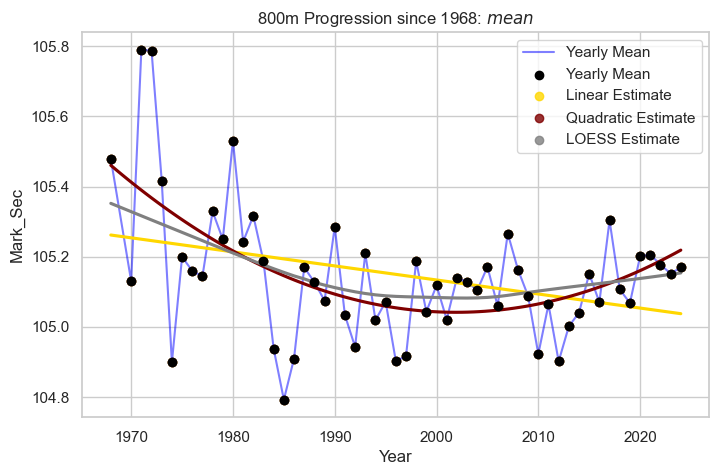

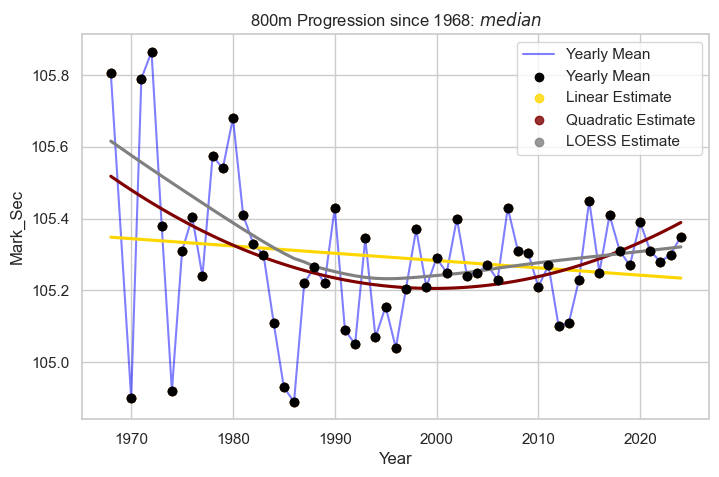

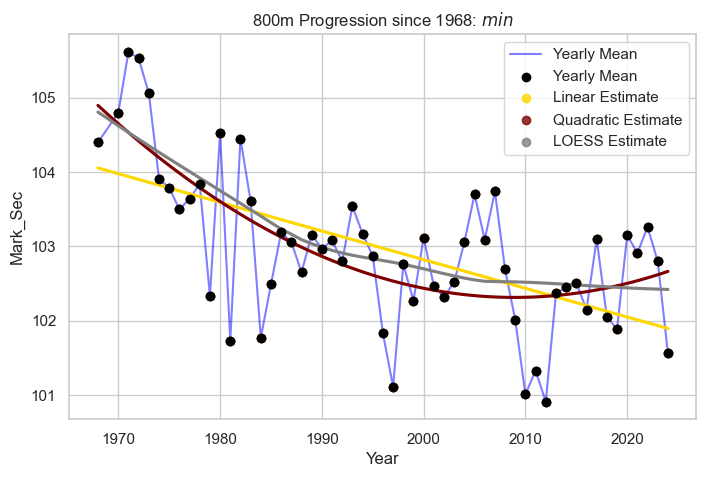

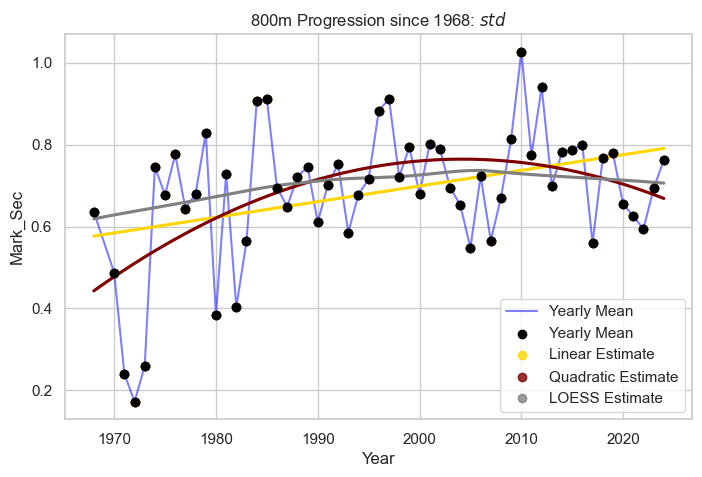

In [125]:
# How do 800m times trend over the years?
fxns = ['mean', 'median', 'min', 'std']

for fxn in fxns:
    yearly_mean_progression = all_time_men[['Year', 'Mark_Sec']].groupby('Year').agg(fxn).reset_index()

    plt.figure(figsize=(5*1.618, 5))

    plt.plot(yearly_mean_progression['Year'], yearly_mean_progression['Mark_Sec'],
            label='Yearly Mean',
            color='blue',
            alpha=0.5)
    plt.scatter(yearly_mean_progression['Year'], yearly_mean_progression['Mark_Sec'],
            label='Yearly Mean',
            color='black',
            zorder=4)
    sns.regplot(yearly_mean_progression,
                x='Year',
                y='Mark_Sec',
                color='gold',
                label='Linear Estimate',
                ci=False)
    sns.regplot(yearly_mean_progression,
                x='Year',
                y='Mark_Sec',
                color='maroon',
                order=2,
                label='Quadratic Estimate',
                ci=False)
    sns.regplot(yearly_mean_progression,
                x='Year',
                y='Mark_Sec',
                color='grey',
                label='LOESS Estimate',
                lowess=True)
    plt.title(f'800m Progression since 1968: ${fxn}$')
    plt.legend()
    plt.show()

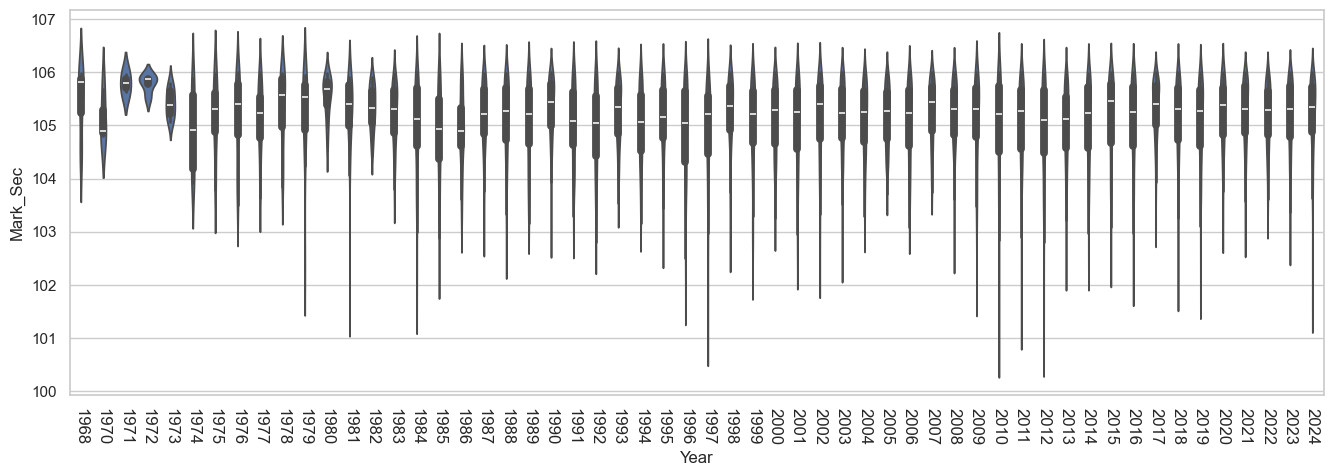

In [121]:
plt.figure(figsize=(10*1.618, 5))
sns.violinplot(all_time_men,
               x='Year',
               y='Mark_Sec')
plt.xticks(rotation=270, fontsize=12)
plt.show()

### All Time Women's Performances

In [174]:
all_time_women = download_all_time_800m(sex='women', pages=139, export=True)

In [180]:
all_time_women['Date'] = pd.to_datetime(all_time_women['Date'], format='%d %b %Y')
all_time_women['Year'] = all_time_women['Date'].dt.year
all_time_women['Mark_Sec'] = all_time_women['Mark'].apply(lambda row: float(row.split(':')[0]) * 60 + float(row.split(':')[1]))
all_time_women.head()

,Rank,Mark,WIND,Competitor,DOB,Nat,Pos,Unnamed: 7,Venue,Date,Results Score,Year,Mark_Sec
0,1,1:53.28,NaN,Jarmila KRATOCHVÍLOVÁ,26 JAN 1951,TCH,1,NaN,München (GER),1983-07-26,1286,1983,113.28
1,2,1:53.43,NaN,Nadezhda OLIZARENKO,28 NOV 1953,URS,1,NaN,"Lenin Stadium, Moskva (URS)",1980-07-27,1283,1980,113.43
2,3,1:54.01,NaN,Pamela JELIMO,05 DEC 1989,KEN,1,NaN,"Letzigrund, Zürich (SUI)",2008-08-29,1272,2008,114.01
3,4,1:54.25,NaN,Caster SEMENYA,07 JAN 1991,RSA,1,NaN,"Stade Charléty, Paris (FRA)",2018-06-30,1267,2018,114.25
4,5,1:54.44,NaN,Ana Fidelia QUIROT,23 MAR 1963,CUB,1,NaN,"Estadio Olímpico, Barcelona (ESP)",1989-09-09,1264,1989,114.44


In [188]:
all_time_women \
    .groupby(['Competitor', 'DOB'])['Mark'] \
    .count() \
    .sort_values(ascending=False) \
    .head(30) \
    .reset_index()

,Competitor,DOB,Mark
0,Maria de Lurdes MUTOLA,27 OCT 1972,216
1,Letitia VRIESDE,05 OCT 1964,129
2,Ajee' WILSON,08 MAY 1994,118
3,Jennifer MEADOWS,17 APR 1981,107
4,Janeth JEPKOSGEI,13 DEC 1983,106
5,Jolanda ČEPLAK,12 SEP 1976,101
6,Ana Fidelia QUIROT,23 MAR 1963,100
7,Joetta CLARK,01 AUG 1962,98
8,Natoya GOULE,30 MAR 1991,97
9,Zulia CALATAYUD,09 NOV 1979,91


In [185]:
# Number of <= 2:02.00 performances by country
all_time_women[['Nat', 'Mark_Sec']] \
                    .groupby('Nat').agg('count') \
                    .sort_values('Mark_Sec', ascending=False) \
                    .head(10)

,Mark_Sec
Nat,
USA,2226
RUS,1504
GBR,1105
KEN,549
URS,492
FRA,409
UKR,402
ROU,373
CAN,361


In [186]:
# Number of individuals who have run <= 2:02 per country
all_time_women[['Nat','Competitor', 'Mark_Sec']] \
                    .groupby('Competitor').agg('min')  \
                    .groupby('Nat').agg('count') \
                    .sort_values('Mark_Sec', ascending=False) \
                    .head(10)

,Mark_Sec
Nat,
USA,183
RUS,119
URS,77
GBR,74
ROU,45
KEN,43
GDR,39
AUS,38
FRA,38


In [197]:
# Top times for US athletes
all_time_women.loc[(all_time_women['Year'] != 2025) &  # == 2024
                   (all_time_women['Nat'] == 'USA')][['Competitor', 'Mark_Sec']] \
                    .groupby('Competitor').agg('count') \
                    .sort_values('Mark_Sec', ascending=False) \
                    .reset_index() \
                    .head(30)

,Competitor,Mark_Sec
0,Michaela ROSE,12
1,Allie WILSON,10
2,McKenna KEEGAN,9
3,Juliette WHITTAKER,9
4,Sophia GORRIARAN,7
5,Samantha WATSON,7
6,Nia AKINS,7
7,Sage HURTA-KLECKER,6
8,Roisin WILLIS,5
9,Olivia BAKER,5


In [196]:
all_time_women.loc[(all_time_women['Year'] != 2025) & 
                   (all_time_women['Nat'] == 'USA')][['Competitor', 'Mark_Sec']] \
                    .groupby('Competitor').agg('median') \
                    .sort_values('Mark_Sec') \
                    .reset_index() \
                    .head(30)

,Competitor,Mark_Sec
0,Mary SLANEY,117.680
1,Mary TABB,118.330
2,Mary DECKER,118.495
3,Athing MU,118.730
4,Jearl MILES-CLARK,119.085
5,Suzy FAVOR HAMILTON,119.545
6,Delisa WALTON-FLOYD,119.660
7,Leann WARREN,119.720
8,Sage HURTA,119.760
9,Linda SHESKEY,119.790
